In [ ]:
from driver_comparisons import  main, plot_driver_speed_change, get_driver_lap_comparison,fastest_laptimes, fastest_lap_comparison, driver_gear_changes, get_driver_aws_data

In [ ]:
silverstone_p1 = main(2022, "British", "Practice 1")

In [ ]:
silverstone_p1.weather_data['TrackTemp']




In [ ]:
from matplotlib import pyplot
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# create the figure and axis objects
fig, ax = plt.subplots()
# plot the data and customize
ax.plot(silverstone_p1.weather_data['TrackTemp'])
ax.set_xlabel('Laps')
ax.set_ylabel('Temperature (*C)')


In [ ]:
from static_plot import static_track_temp, static_track_conditions



In [ ]:
static_track_temp(silverstone_p1)

In [ ]:
static_track_conditions(silverstone_p1)

In [ ]:
# animated_line_plot.py

from random import randint

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# create empty lists for the x and y data
x = []
y = []

# create the figure and axes objects
fig, ax = plt.subplots()

# function that draws each frame of the animation
def animate(i):
    pt = randint(1,9) # grab a random integer to be the next y-value in the animation
    x.append(i)
    y.append(pt)

    ax.clear()
    ax.plot(x, y)
    ax.set_xlim([0,20])
    ax.set_ylim([0,10])
# run the animation
ani = FuncAnimation(fig, animate, frames=20, interval=500, repeat=False)

plt.show()


In [ ]:
silverstone_weather_df = silverstone_p1.weather_data
silverstone_weather_df


In [ ]:
silverstone_tracktemp = silverstone_weather_df[['TrackTemp',"AirTemp","Humidity","WindSpeed"]]
from pandas import read_csv
from matplotlib import pyplot

silverstone_tracktemp.plot()
pyplot.show()

In [ ]:
df_silverstone_p1= silverstone_p1.laps
df_silverstone_p1 = df_silverstone_p1[df_silverstone_p1["LapTime"].notna()]
df_silverstone_p1.sort_values(["LapTime"])


In [ ]:
df_silverstone_p1.columns

In [ ]:
silverstone_p2 = main(2022, "British", "FP2")

In [ ]:
def sort_fastest_practice_time(session):
    df_silverstone_p= session.laps
    df_silverstone_p = df_silverstone_p[df_silverstone_p["LapTime"].notna()]
    df_silverstone_p = df_silverstone_p.sort_values(["LapTime"])
    return(df_silverstone_p)

In [ ]:
sort_fastest_practice_time(silverstone_p2).head()

In [ ]:
fastest_laptimes(silverstone_p2)

In [ ]:
fastest_lap_comparison("LAT","SAI", silverstone_p2)

In [ ]:
carlo_GP = silverstone_p2.laps.pick_driver('SAI')

carlo_GP = carlo_GP.sort_values(by=["LapTime"], ascending=True)
carlo_GP


In [ ]:
silverstone_p2.weather_data

In [ ]:
static_track_conditions(silverstone_p2)

In [ ]:
get_driver_aws_data("SAI","HAM", 0000, 5800, silverstone_p2)

In [ ]:
fastest_lap_comparison("HAM","SAI",silverstone_p2)

In [ ]:
get_driver_lap_comparison("SAI","LEC", silverstone_p2)

In [ ]:
driver_gear_changes("SAI", silverstone_p2)

In [ ]:
driver_gear_changes("HAM",silverstone_p2)

In [ ]:
carlo_GP = carlo_GP['LapTime']

carlo_GP.plot()
pyplot.show()

In [ ]:
carlo_GP

In [11]:
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection

import numpy as np
import pandas as pd

import fastf1 as ff1
from fastf1 import utils
from fastf1.core import Laps
from fastf1 import plotting

from timple.timedelta import strftimedelta


def get_driver_lap_comparison(driver1, driver2, session):
    
    '''This function is to take telementry data from each driver, and compare the respective
    lap times in regard to fastest lap time data.'''

    # Laps can now be accessed through the .laps object coming from the session
    laps_driver_1 = session.laps.pick_driver(driver1)
    laps_driver_2 = session.laps.pick_driver(driver2)

    # Select the fastest lap
    fastest_driver_1 = laps_driver_1.pick_fastest()
    fastest_driver_2 = laps_driver_2.pick_fastest()

    # Retrieve the telemetry and add the distance column
    telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
    telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

    # Make sure whe know the team name for coloring
    team_driver_1 = fastest_driver_1['Team']
    team_driver_2 = fastest_driver_2['Team']

    # extract delta time
    delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

    driver1_color = ff1.plotting.team_color(team_driver_1)
    driver2_color = ff1.plotting.team_color(team_driver_2)
    alt1_color = ff1.plotting.team_color("RBR")
    alt2_color = ff1.plotting.team_color("FER")


    plot_size = [15, 15]
    plot_title = f"{session.event.year} {session.event.EventName} - {session.name} - {driver1} VS {driver2}"
    #plot_ratios = [1, 3, 2, 1, 1, 2]
    plot_ratios = [1, 3, 2, 1, 1, 2, 1, 2]
    plot_filename = plot_title.replace(" ", "") + ".png"




    # Make plot a bit bigger
    plt.rcParams['figure.figsize'] = plot_size


    # Create subplots with different sizes
    #fig, ax = plt.subplots(6, gridspec_kw={'height_ratios': plot_ratios})
    # Create subplots with different sizes which includes DRS data
    fig, ax = plt.subplots(8, gridspec_kw={'height_ratios': plot_ratios})


    # Set the plot title
    ax[0].title.set_text(plot_title)


    # Delta line
    ax[0].plot(ref_tel['Distance'], delta_time)
    ax[0].axhline(0)
    ax[0].set(ylabel=f"Gap to {driver2} (s)")

    # Speed trace
    ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver1, color=driver1_color)
    ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver2, color=driver2_color)
    ax[1].set(ylabel='Speed')
    ax[1].legend(loc="lower right")

    # Throttle trace
    ax[2].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Throttle'], label=driver1, color=driver1_color)
    ax[2].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Throttle'], label=driver2, color=driver2_color)
    ax[2].set(ylabel='Throttle')

    # Brake trace
    ax[3].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Brake'], label=driver1, color=driver1_color)
    ax[3].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Brake'], label=driver2, color=driver2_color)
    ax[3].set(ylabel='Brake')

    # Gear trace
    ax[4].plot(telemetry_driver_1['Distance'], telemetry_driver_1['nGear'], label=driver1, color=driver1_color)
    ax[4].plot(telemetry_driver_2['Distance'], telemetry_driver_2['nGear'], label=driver2, color=driver2_color)
    ax[4].set(ylabel='Gear')

    # RPM trace
    ax[5].plot(telemetry_driver_1['Distance'], telemetry_driver_1['RPM'], label=driver1, color=driver1_color)
    ax[5].plot(telemetry_driver_2['Distance'], telemetry_driver_2['RPM'], label=driver2, color=driver2_color)
    ax[5].set(ylabel='RPM')

    # DRS trace
    ax[6].plot(telemetry_driver_1['Distance'], telemetry_driver_1['DRS'], label=driver1, color=driver1_color)
    ax[6].plot(telemetry_driver_2['Distance'], telemetry_driver_2['DRS'], label=driver2, color=driver2_color)
    ax[6].set(ylabel='DRS')
    ax[6].set(xlabel='Lap distance (meters)')


    ax[7].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Time'],  label=driver1, color=driver1_color)
    ax[7].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Time'], label=driver2, color=driver2_color)
    ax[7].set(ylabel='Laptime', xlabel='Lap')
    ax[7].legend(loc="upper center")


    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for a in ax.flat:
        a.label_outer()
        
    # Store figure
    plt.savefig(plot_filename, dpi=300)

# Would be nice to have a conditional statement that ensures the colours are not the same
    if driver1_color == driver2_color:
        print('Same Team Color')
        
        return(ax[1].plot(telemetry_driver_1['Distance'], telemetry_driver_1['Speed'], label=driver1, color=driver1_color)).replace(driver1_color,alt1_color)
        return(ax[1].plot(telemetry_driver_2['Distance'], telemetry_driver_2['Speed'], label=driver2, color=driver2_color)).replace(driver2_color,alt2_color)

        
    
    plt.show()  

In [ ]:
get_driver_lap_comparison("SAI","BOT", silverstone_p2)

In [ ]:
silverstone_p2.laps

In [ ]:
drivers = pd.unique(silverstone_p2.laps['Driver'])
print(drivers)

list_fastest_laps = list()

for drv in drivers:
    drvs_fastest_lap = silverstone_p2.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

    # plot is nicer to look at and more easily understandable if we just plot the time differences.
    #  Therefore we subtract the fastest lap time from all other lap times.
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = ff1.plotting.team_color(lap['Team'])
    team_colors.append(color)

In [ ]:
tyrelife = pd.unique(silverstone_p2.laps['TyreLife'])
for d in tyrelife:
    print(d)


In [ ]:
tyrelife

In [ ]:
tyres_fastest_lap

### Qualifying Data Analysis below:



In [ ]:
quali_silverstone = main(2022, "British", "Q")

In [ ]:
fastest_laptimes(quali_silverstone)

In [24]:

import pandas as pd
import numpy as np
import random
import requests

# Don't forget to 'pip install fastf1'
import fastf1 as ff1
from fastf1 import plotting

# Don't forget to 'pip install seaborn'
import seaborn as sns
import matplotlib.pyplot as plt


def ergast_retrieve(api_endpoint: str):
    '''we created a method called ergast_retrieve(). Ergast has many different endpoints
     (e.g. for championship standings, race results, qualifying results, et cetera)'''

    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']


def get_constructor_rankings():
    # Specify the number of rounds we want in our plot (in other words, specify the current round)
    rounds = 8

    # Initiate an empty dataframe to store our data
    all_championship_standings = pd.DataFrame()

    # We also want to store which driver drives for which team, which will help us later
    driver_team_mapping = {}

    # Initate a loop through all the rounds
    for i in range(1, rounds + 1):
        # Make request to driverStandings endpoint for the current round
        race = ergast_retrieve(f'current/{i}/driverStandings')
        
        # Get the standings from the result
        standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']
        
        # Initiate a dictionary to store the current rounds' standings in
        current_round = {'round': i}
        
        # Loop through all the drivers to collect their information
        for i in range(len(standings)):
            driver = standings[i]['Driver']['code']
            position = standings[i]['position']
            
            # Store the drivers' position
            current_round[driver] = int(position)
            
            # Create mapping for driver-team to be used for the coloring of the lines
            driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']


        # Append the current round to our fial dataframe
        all_championship_standings = all_championship_standings.append(current_round, ignore_index=True)
        
    # Set the round as the index of the dataframe
    all_championship_standings = all_championship_standings.set_index('round')
    # Melt data so it can be used as input for plot
    all_championship_standings_melted = pd.melt(all_championship_standings.reset_index(), ['round'])

    # Increase the size of the plot 
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    # Initiate the plot
    fig, ax = plt.subplots()

    # Set the title of the plot
    ax.set_title("2021 Championship Standings until round 18")

    # Draw a line for every driver in the data by looping through all the standings
    # The reason we do it this way is so that we can specify the team color per driver
    for driver in pd.unique(all_championship_standings_melted['variable']):
        sns.lineplot(
            x='round', 
            y='value', 
            data=all_championship_standings_melted.loc[all_championship_standings_melted['variable']==driver], 
            color = ff1.plotting.team_color(driver_team_mapping[driver])
        )

    # Invert Y-axis to have championship leader (#1) on top
    ax.invert_yaxis()

    # Set the values that appear on the x- and y-axes
    ax.set_xticks(range(1, rounds))
    ax.set_yticks(range(1, 22))

    # Set the labels of the axes
    ax.set_xlabel("Round")
    ax.set_ylabel("Championship position")

    # Disable the gridlines 
    ax.grid(False)


    # Add the driver name to the lines
    for line, name in zip(ax.lines, all_championship_standings.columns.tolist()):
        y = line.get_ydata()[-1]
        x = line.get_xdata()[-1]
            
        text = ax.annotate(
            name,
            xy=(x + 0.1, y),
            xytext=(0, 0),
            color=line.get_color(),
            xycoords=(
                ax.get_xaxis_transform(),
                ax.get_yaxis_transform()
            ),
            textcoords="offset points"
        )

    # Save the plot
    plt.show()

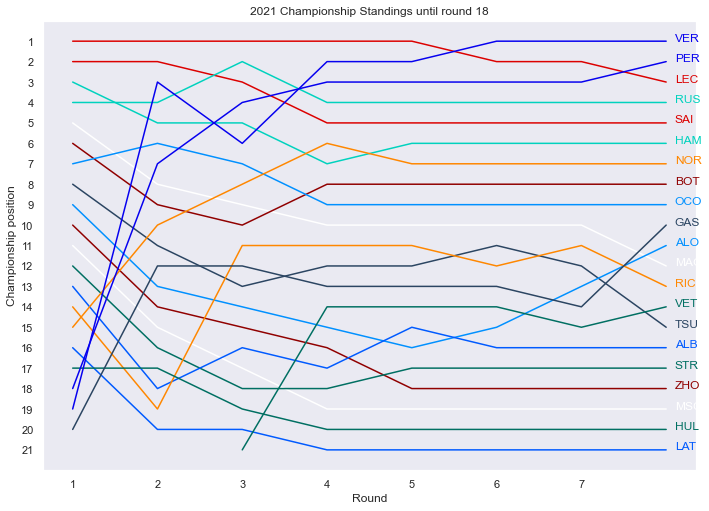

In [25]:
get_constructor_rankings()